In [91]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
data= pd.read_csv("insurance (1).csv")
print(data.head()) 

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [92]:
merged_data = pd.read_csv('insurance (1).csv')

In [75]:
print(merged_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


In [76]:
data.shape

(1338, 7)

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [78]:
#chacking for missing values
print(data.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [79]:
#Data Preprocessing
from sklearn.preprocessing import LabelEncoder
# Encoding categorical variables
encoder = LabelEncoder()
data['sex'] = encoder.fit_transform(data['sex'])
data['smoker'] = encoder.fit_transform(data['smoker'])
data['region'] = encoder.fit_transform(data['region'])
print(data.head()) 

   age  sex     bmi  children  smoker  region      charges
0   19    0  27.900         0       1       3  16884.92400
1   18    1  33.770         1       0       2   1725.55230
2   28    1  33.000         3       0       2   4449.46200
3   33    1  22.705         0       0       1  21984.47061
4   32    1  28.880         0       0       1   3866.85520


In [80]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define features and target
X = data.drop('charges', axis=1)
y = data['charges']

# Split dataset into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model evaluation
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"R² Score: {r2_score(y_test, y_pred)}")

MAE: 4186.508898366432
MSE: 33635210.431178406
R² Score: 0.7833463107364539


In [81]:
#statistical measures of the dataset
data.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


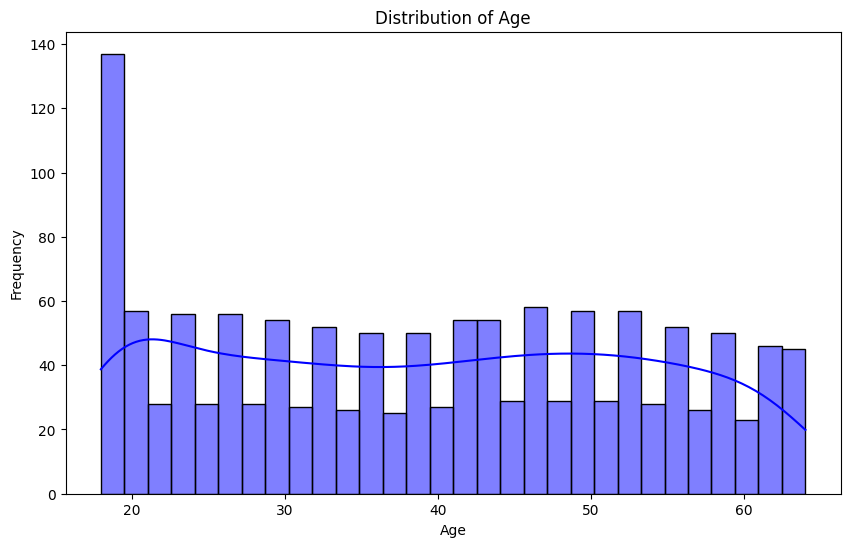

In [82]:
# distribution of age
plt.figure(figsize=(10, 6))
sns.histplot(data['age'], kde=True, bins=30, color='blue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

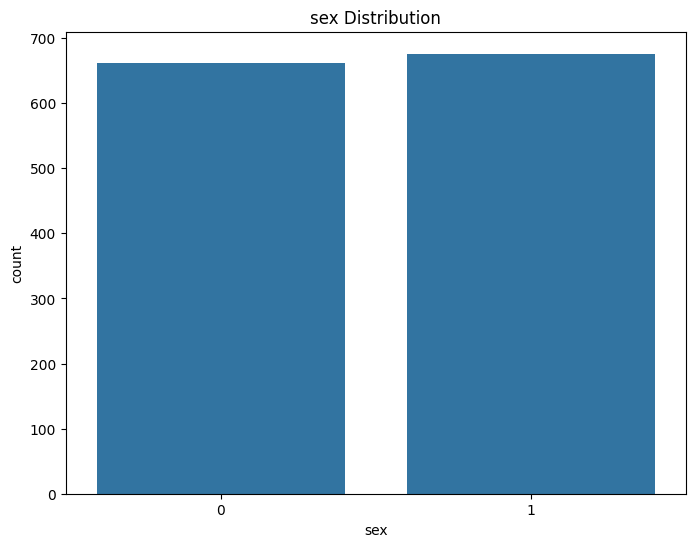

In [83]:
#distribution of gender colum
plt.figure(figsize=(8, 6))
sns.countplot(x='sex', data=data)
plt.title('sex Distribution')
plt.show()

In [84]:
data["sex"].value_counts()

sex
1    676
0    662
Name: count, dtype: int64

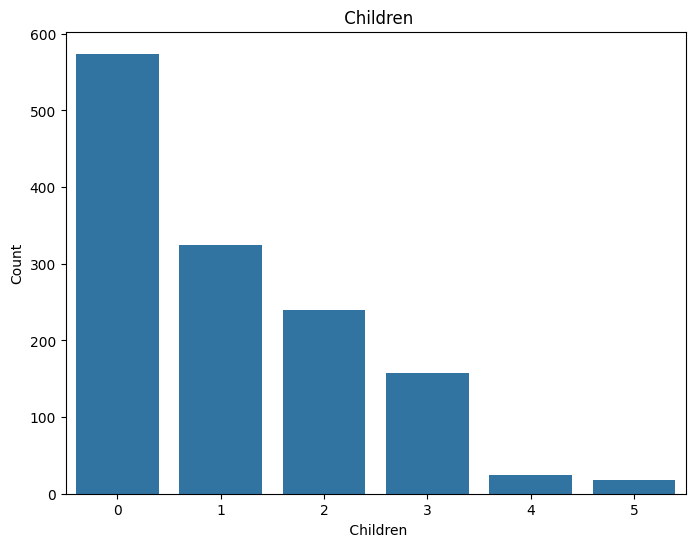

In [85]:
# children column
plt.figure(figsize=(8, 6))
sns.countplot(x='children', data=data)
plt.title(' Children')
plt.xlabel(' Children')
plt.ylabel('Count')
plt.show()

In [55]:
data["children"].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

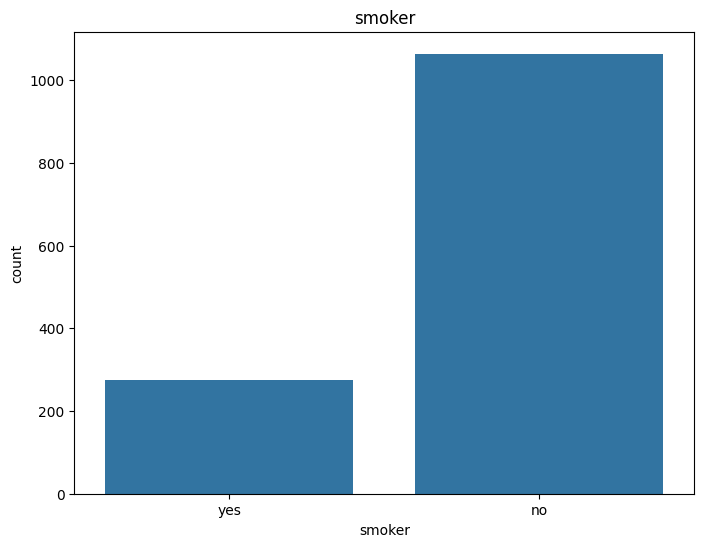

In [93]:
plt.figure(figsize=(8, 6))
sns.countplot(x='smoker', data=data)
plt.title('smoker')
plt.show()

In [86]:
# Convert categorical variables to numerical using one-hot encoding
data = pd.get_dummies(data, columns=['sex', 'smoker', 'region'], drop_first=True)

#  Create a new feature: BMI categories
data['bmi_category'] = pd.cut(data['bmi'], bins=[0, 18.5, 24.9, 29.9, np.inf], labels=['Underweight', 'Normal', 'Overweight', 'Obese'])

#Convert BMI categories to numerical using one-hot encoding
data = pd.get_dummies(data, columns=['bmi_category'], drop_first=True)

# Create a new feature: Age groups
data['age_group'] = pd.cut(data['age'], bins=[0, 18, 35, 50, np.inf], labels=['0-18', '19-35', '36-50', '51+'])

# Convert Age groups to numerical using one-hot encoding
data = pd.get_dummies(data, columns=['age_group'], drop_first=True)

#  Create a new feature: Children categories
data['children_category'] = pd.cut(data['children'], bins=[-1, 0, 1, 2, np.inf], labels=['0', '1', '2', '3+'])

# Convert Children categories to numerical using one-hot encoding
data = pd.get_dummies(data, columns=['children_category'], drop_first=True)

# Display the first few rows after feature engineering
print("Dataset after feature engineering:\n", data.head())

# Check the shape of the dataset
print("Dataset shape:", data.shape)

Dataset after feature engineering:
    age     bmi  children      charges  sex_1  smoker_1  region_1  region_2  \
0   19  27.900         0  16884.92400  False      True     False     False   
1   18  33.770         1   1725.55230   True     False     False      True   
2   28  33.000         3   4449.46200   True     False     False      True   
3   33  22.705         0  21984.47061   True     False      True     False   
4   32  28.880         0   3866.85520   True     False      True     False   

   region_3  bmi_category_Normal  bmi_category_Overweight  bmi_category_Obese  \
0      True                False                     True               False   
1     False                False                    False                True   
2     False                False                    False                True   
3     False                 True                    False               False   
4     False                False                     True               False   

   age_g

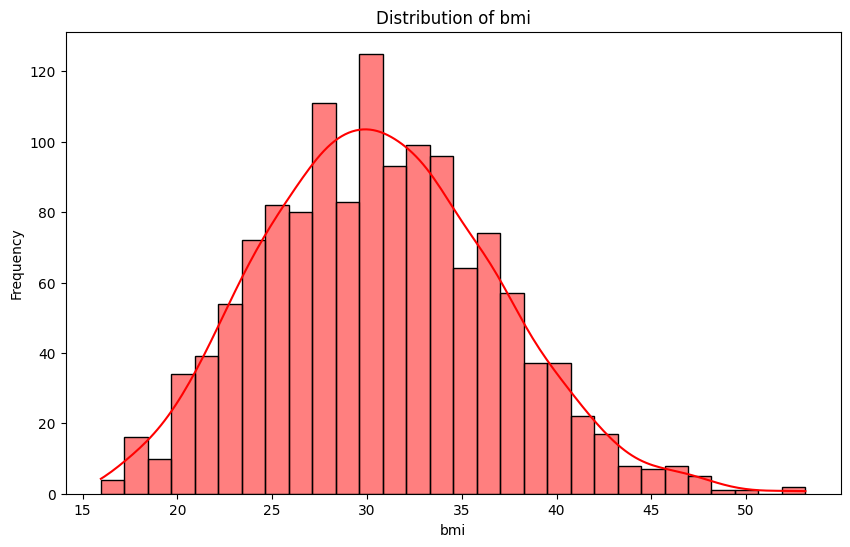

In [87]:
# distribution of bmi
plt.figure(figsize=(10, 6))
sns.histplot(data['bmi'], kde=True, bins=30, color='red')
plt.title('Distribution of bmi')
plt.xlabel('bmi')
plt.ylabel('Frequency')
plt.show()

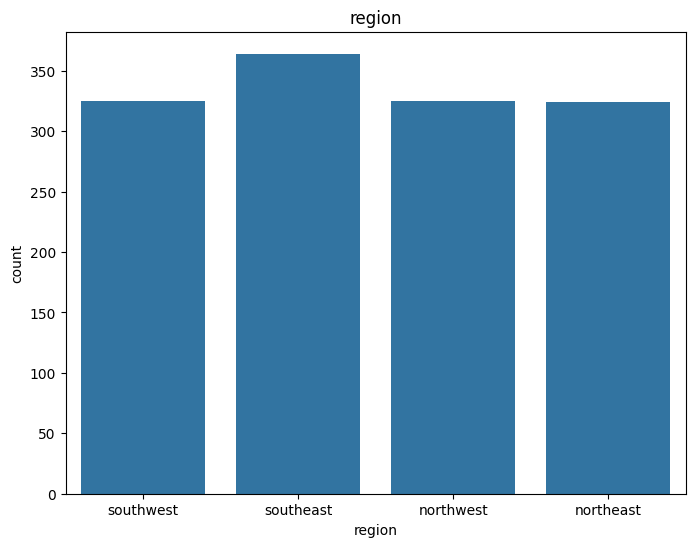

In [94]:
plt.figure(figsize=(8, 6))
sns.countplot(x='region', data= data)
plt.title('region')
plt.show()

In [7]:
data["region"].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

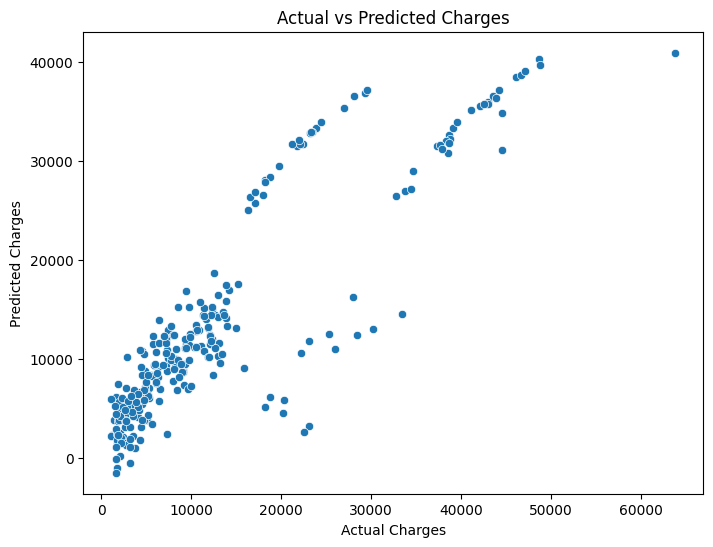

In [41]:
# Visualizing Predictions Plot actual vs. predicted values:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Charges")
plt.show()


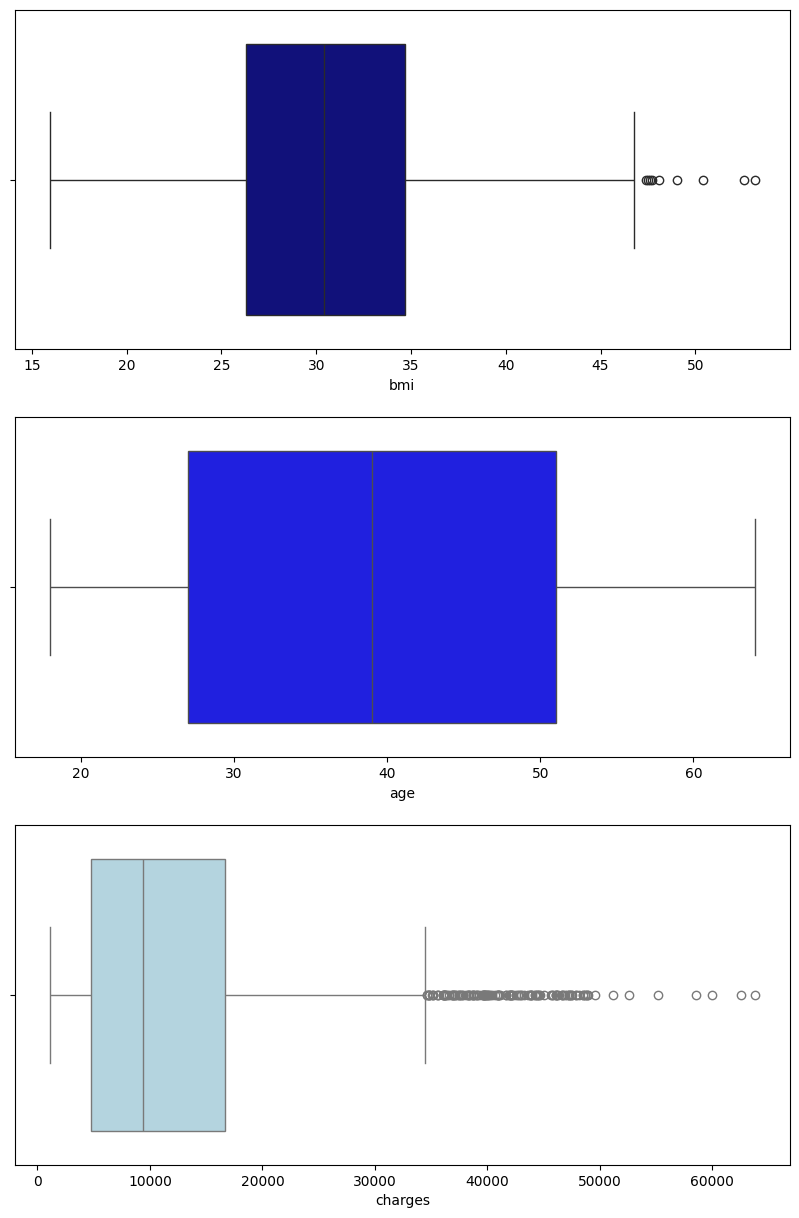

In [15]:
plt.figure(figsize= (10,15))
plt.subplot(3,1,1)
sns.boxplot(x= data.bmi, color='darkblue')

plt.subplot(3,1,2)
sns.boxplot(x= data.age, color='blue')

plt.subplot(3,1,3)
sns.boxplot(x= data.charges, color='lightblue')
plt.show()

In [17]:
def detect_outliers_iqr(column, threshold=1.5):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - threshold * iqr
    upper_bound = q3 + threshold * iqr
    outliers = (column < lower_bound) | (column > upper_bound)
    return outliers

columns = ['age', 'bmi', 'charges']
outliers = data[columns].apply(detect_outliers_iqr)

print("Number of outliers:")
print(outliers.sum())

Number of outliers:
age          0
bmi          9
charges    139
dtype: int64


In [19]:
data_cleaned = data[~outliers.any(axis=1)]

print("Original DataFrame shape:", data.shape)
print("Cleaned DataFrame shape:", data_cleaned.shape)

Original DataFrame shape: (1338, 7)
Cleaned DataFrame shape: (1193, 7)


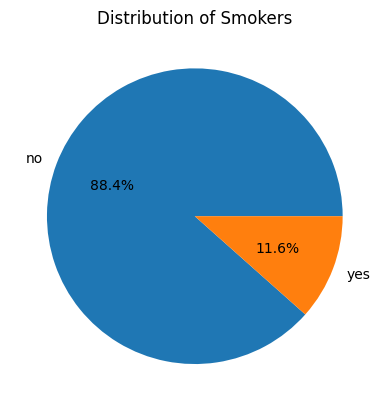

In [26]:
smoker_counts = data_cleaned['smoker'].value_counts()
plt.pie(smoker_counts, labels=smoker_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Smokers')
plt.show()

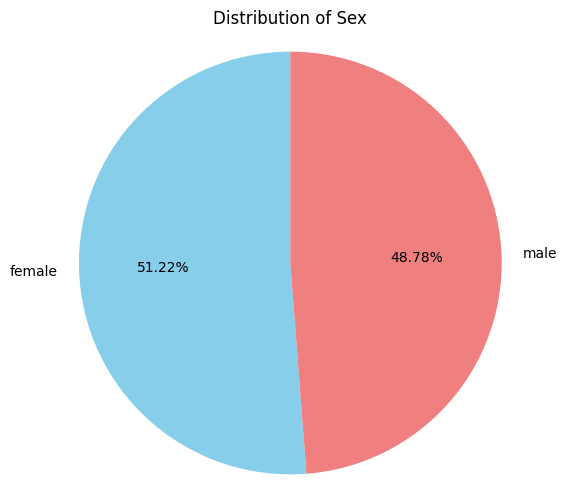

In [27]:
plt.figure(figsize=(6, 6))
sex_counts = data_cleaned['sex'].value_counts()
plt.pie(sex_counts, labels=sex_counts.index, autopct='%.2f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title("Distribution of Sex")
plt.axis('equal')
plt.show()

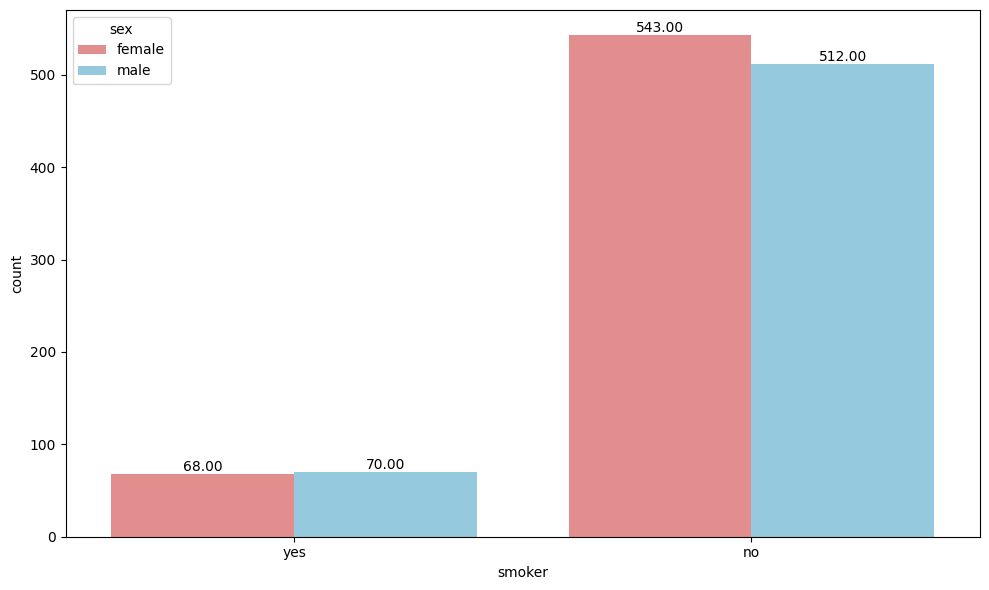

In [71]:
plt.figure(figsize=(10, 6))
sns.countplot(x='smoker', data = data_cleaned,palette=['lightcoral','skyblue'],hue='sex')
for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%.2f')
plt.tight_layout()
plt.show()

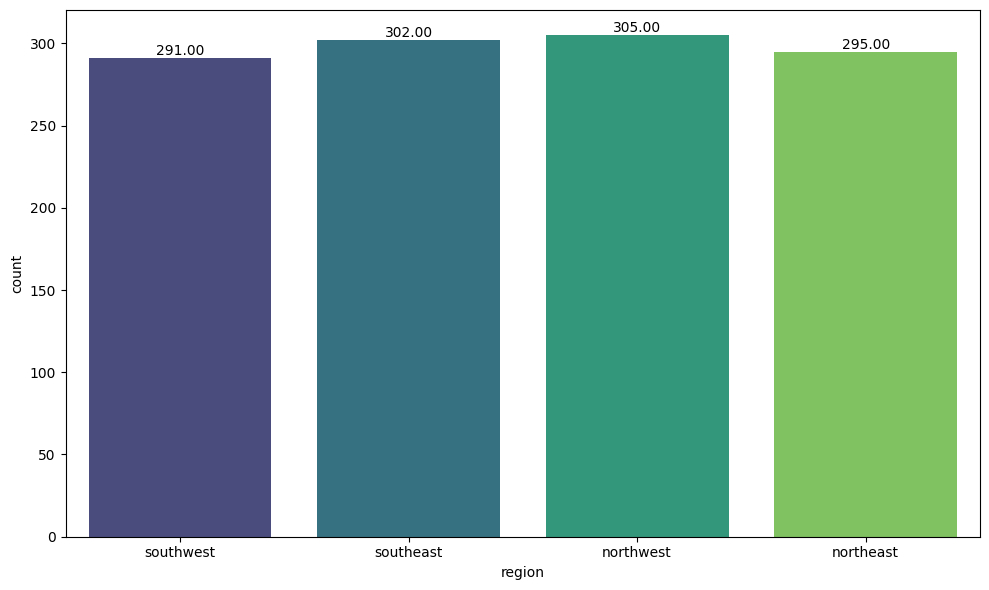

In [70]:
plt.figure(figsize=(10, 6))
sns.countplot(x='region', data = data_cleaned,palette='viridis')
for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%.2f')
plt.tight_layout()
plt.show()

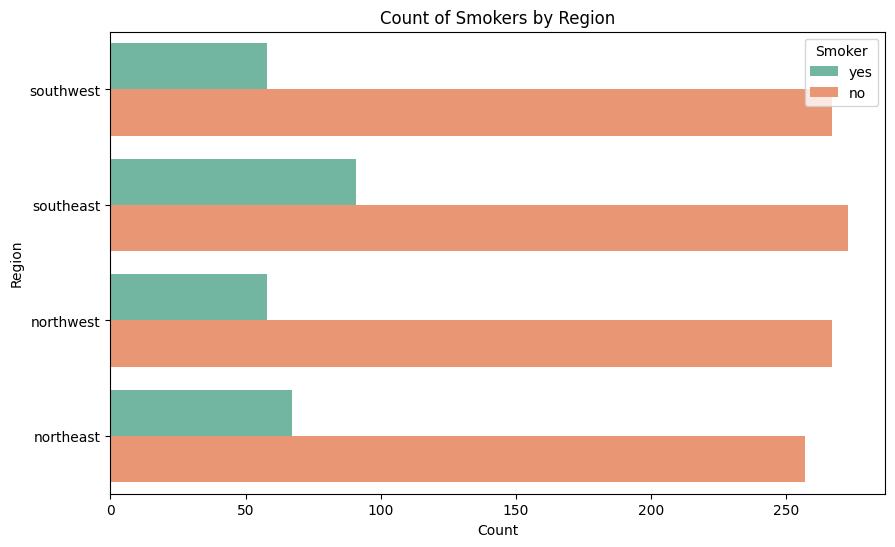

In [50]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, y='region', hue='smoker', palette='Set2')
plt.xlabel('Count')
plt.ylabel('Region')
plt.title('Count of Smokers by Region')
plt.legend(title='Smoker', loc='upper right')
plt.show()

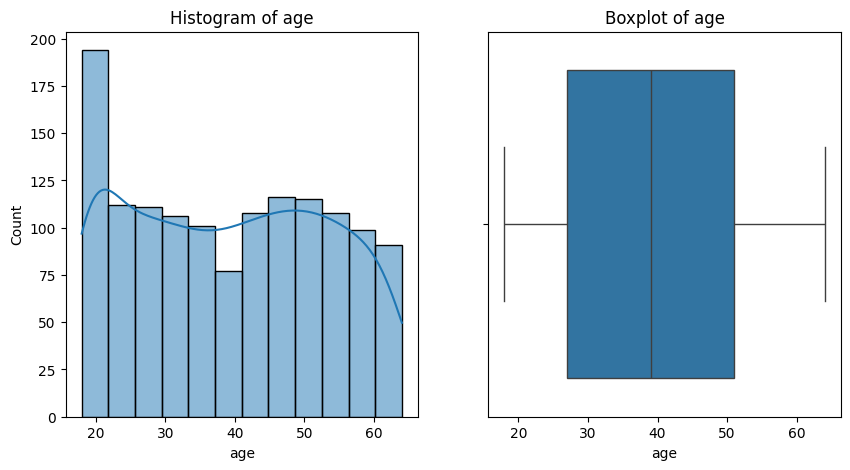

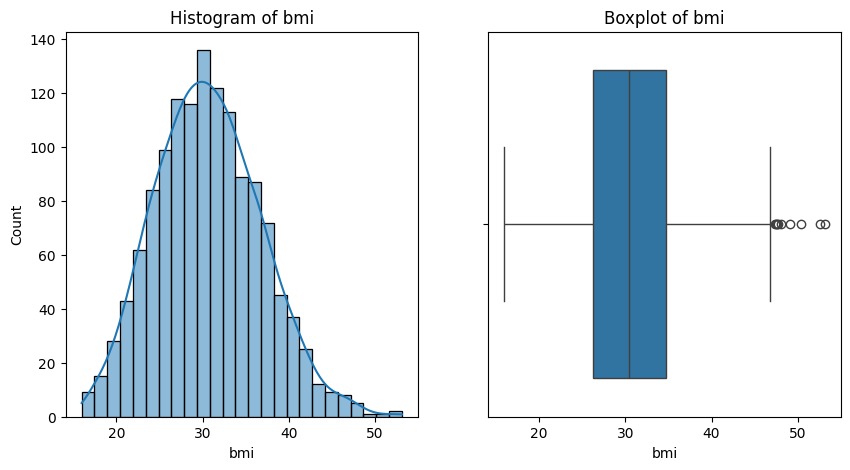

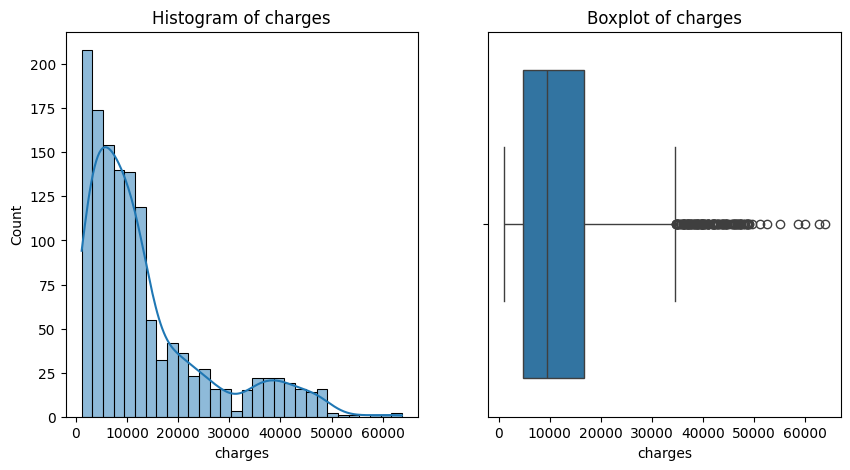

In [58]:
for column in columns:
    plt.figure(figsize=(10, 5))
    
  # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data[column], kde=True)
    plt.title(f'Histogram of {column}')
    
    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot of {column}')

In [97]:
# Encoding categorical variables
data['sex'] = data['sex'].map({'male': 0, 'female': 1})
data['smoker'] = data['smoker'].map({'yes': 1, 'no': 0})

# One-hot encoding for 'region' (since it has more than two categories)
data = pd.get_dummies(data, columns=['region'], drop_first=True)  # drop_first=True avoids dummy variable trap

print("\nAfter Encoding:")
print(data.head())


After Encoding:
   age  sex     bmi  children  smoker      charges  region_northwest  \
0   19  NaN  27.900         0     NaN  16884.92400             False   
1   18  NaN  33.770         1     NaN   1725.55230             False   
2   28  NaN  33.000         3     NaN   4449.46200             False   
3   33  NaN  22.705         0     NaN  21984.47061              True   
4   32  NaN  28.880         0     NaN   3866.85520              True   

   region_southeast  region_southwest  
0             False              True  
1              True             False  
2              True             False  
3             False             False  
4             False             False  


In [59]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [60]:
import numpy as np # linear algebra
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [61]:
#read_csv functions helps to load the csv file data and create a dataframe in pandas
healthcare = pd.read_csv('insurance (1).csv')
healthcare.head().T

,0,1,2,3,4
age,19,18,28,33,32
sex,female,male,male,male,male
bmi,27.9,33.77,33.0,22.705,28.88
children,0,1,3,0,0
smoker,yes,no,no,no,no
region,southwest,southeast,southeast,northwest,northwest
charges,16884.924,1725.5523,4449.462,21984.47061,3866.8552


In [63]:
#using for loop to find the distribution of data for categorical columns
for col in healthcare.columns:
    if healthcare[col].dtype == 'O' and col != 'Doctor' and col!= 'Hospital':
        print(healthcare[col].value_counts())
        print('--')

sex
male      676
female    662
Name: count, dtype: int64
--
smoker
no     1064
yes     274
Name: count, dtype: int64
--
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64
--


In [101]:
x= data.drop(columns="charges", axis=1)
y= data["charges"]
print(x)

      age  sex     bmi  children  smoker  region_northwest  region_southeast  \
0      19  NaN  27.900         0     NaN             False             False   
1      18  NaN  33.770         1     NaN             False              True   
2      28  NaN  33.000         3     NaN             False              True   
3      33  NaN  22.705         0     NaN              True             False   
4      32  NaN  28.880         0     NaN              True             False   
...   ...  ...     ...       ...     ...               ...               ...   
1333   50  NaN  30.970         3     NaN              True             False   
1334   18  NaN  31.920         0     NaN             False             False   
1335   18  NaN  36.850         0     NaN             False              True   
1336   21  NaN  25.800         0     NaN             False             False   
1337   61  NaN  29.070         0     NaN              True             False   

      region_southwest  
0             

In [102]:
print (y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


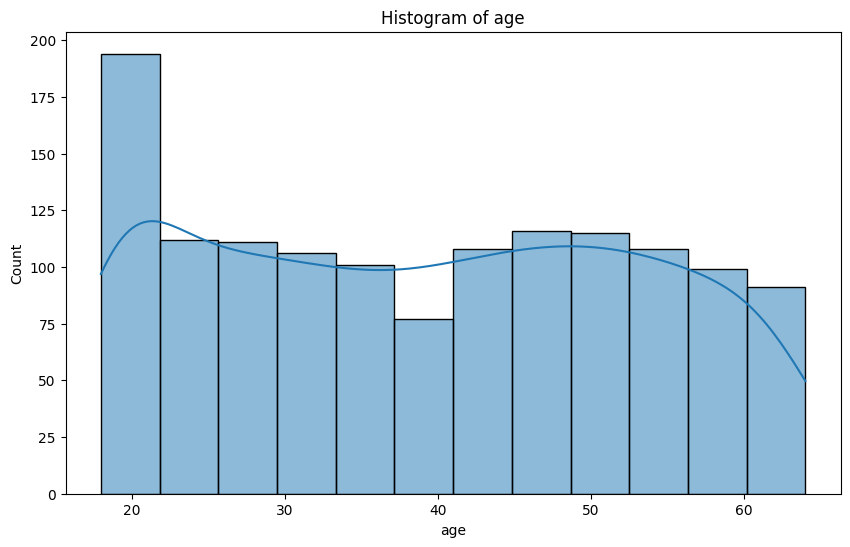

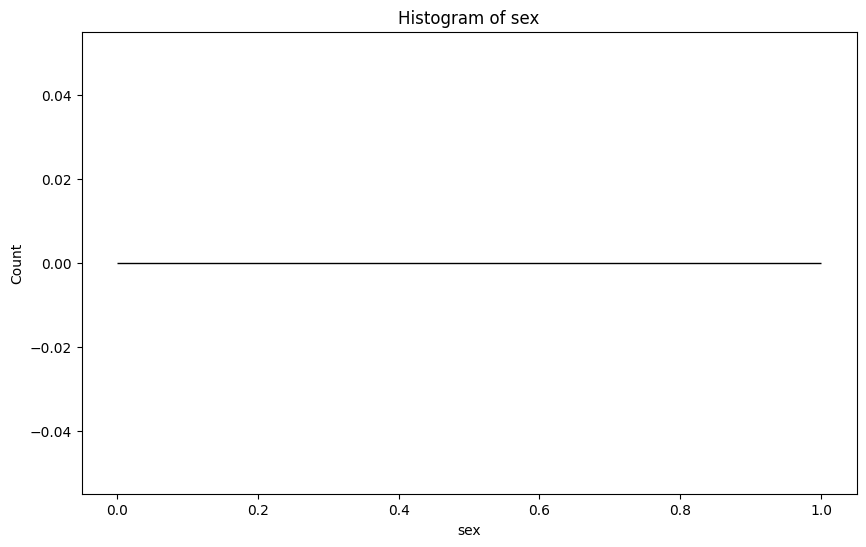

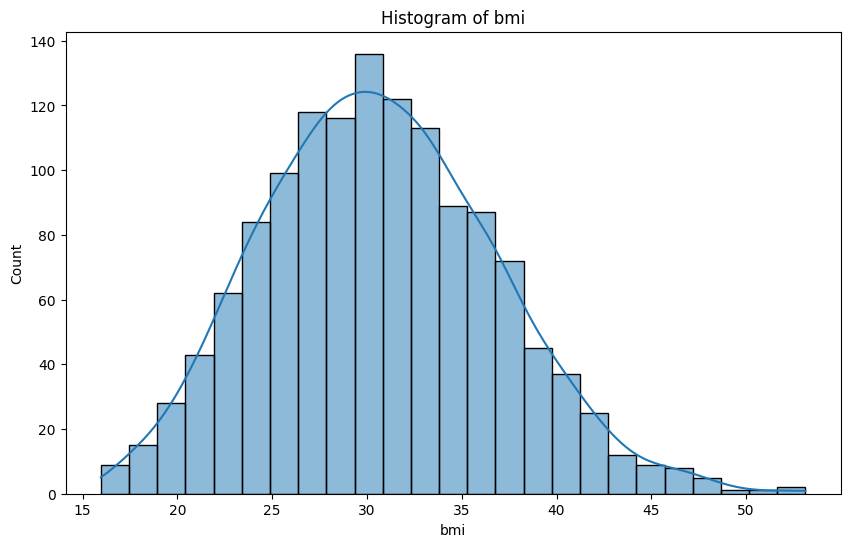

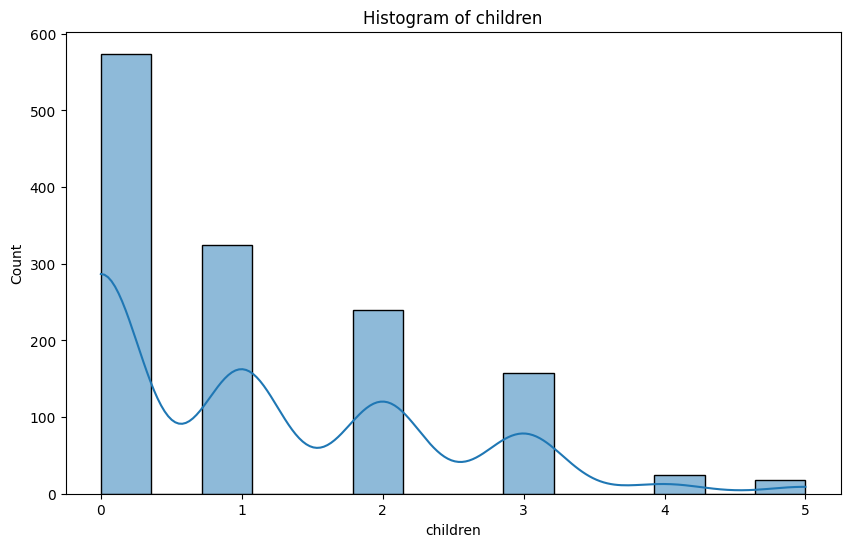

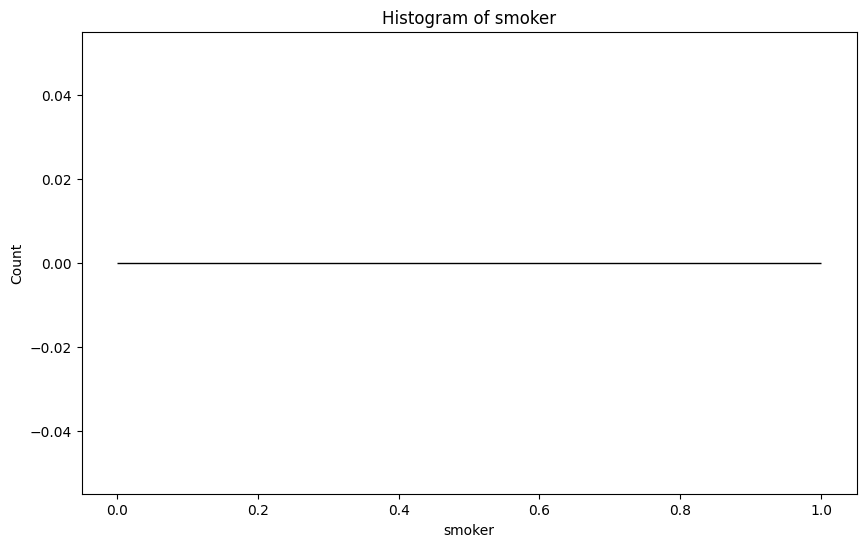

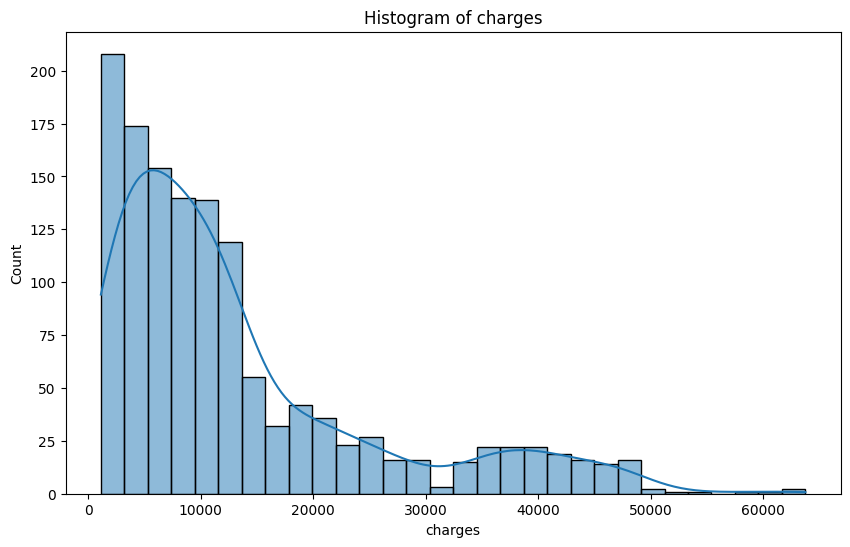

               age  sex          bmi     children  smoker       charges
count  1338.000000  0.0  1338.000000  1338.000000     0.0   1338.000000
mean     39.207025  NaN    30.663397     1.094918     NaN  13270.422265
std      14.049960  NaN     6.098187     1.205493     NaN  12110.011237
min      18.000000  NaN    15.960000     0.000000     NaN   1121.873900
25%      27.000000  NaN    26.296250     0.000000     NaN   4740.287150
50%      39.000000  NaN    30.400000     1.000000     NaN   9382.033000
75%      51.000000  NaN    34.693750     2.000000     NaN  16639.912515
max      64.000000  NaN    53.130000     5.000000     NaN  63770.428010
Outliers in age:
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, charges, region_northwest, region_southeast, region_southwest]
Index: []
Outliers in sex:
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, charges, region_northwest, region_southeast, region_southwest]
Index: []
Outliers in bmi:
      age  sex    bmi  children  smok

In [105]:
 #Visualize the distribution of numerical variables
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.show()

# Calculate descriptive statistics
descriptive_stats = data[numeric_columns].describe()
print(descriptive_stats)

# Check for outliers using IQR method
for col in numeric_columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    print(f"Outliers in {col}:")
    print(outliers)

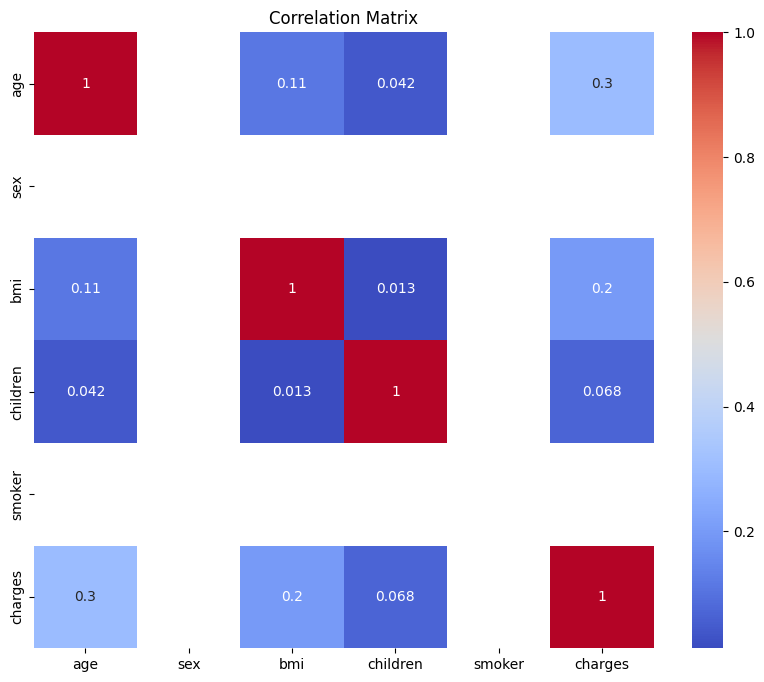


Highly correlated variable pairs:


In [103]:
# List of categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns

for col in categorical_columns:
    print(f"\nDistribution of {col}:")
    value_counts = data[col].value_counts()
    print(value_counts)
    
    # Plot bar chart
    plt.figure(figsize=(10, 6))
    sns.barplot(x=value_counts.index, y=value_counts.values, order=value_counts.index)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)  # Rotate for better readability if needed
    plt.show()

    # Check for missing values
    print(f"Missing values in {col}: {data[col].isnull().sum()}")

# List of numeric columns
numeric_columns = data.select_dtypes(include=[np.number]).columns

# Calculate correlation matrix
corr_matrix = data[numeric_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Identify highly correlated pairs
threshold = 0.7
correlated_pairs = [
    (numeric_columns[i], numeric_columns[j])
    for i in range(len(numeric_columns))
    for j in range(i+1, len(numeric_columns))
    if abs(corr_matrix.iloc[i, j]) > threshold
]

print("\nHighly correlated variable pairs:")
for pair in correlated_pairs:
    print(pair)